In [77]:
import numpy as np
generator = np.random.RandomState(150777)

In [78]:
x = generator.randint(100,size=10)
x

array([14, 59, 54, 88, 89, 12, 72,  4, 62, 22])

In [79]:
([x[3], x[7], x[2]]),type([x[3], x[7], x[2]])

([88, 4, 54], list)

In [80]:
indices = [3,7,2]
x[indices],type(x)

(array([88,  4, 54]), numpy.ndarray)

### fancy indexing basics
When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed:

In [81]:
indices_matrix = generator.randint?

In [ ]:
indices_matrix = generator.randint

In [82]:
indices_matrix = generator.randint

In [83]:
indices_matrix = generator.randint

In [84]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
indices_matrix = generator.randint(0,10,size=12).reshape((4,3))
indices_matrix

array([[4, 1, 4],
       [9, 4, 7],
       [5, 8, 4],
       [8, 5, 7]])

In [85]:
x[indices_matrix]

array([[89, 59, 89],
       [22, 89,  4],
       [12, 62, 89],
       [62, 12,  4]])

Fancy indexing also works in multiple dimensions. Consider the following array:


In [86]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [87]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

In [88]:
row[:,np.newaxis]

array([[0],
       [1],
       [2]])

In [89]:
# broadcasting
row[:,np.newaxis]+col

array([[2, 1, 3],
       [3, 2, 4],
       [4, 3, 5]])

In [90]:
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [91]:
(row[:,np.newaxis]+col).shape

(3, 3)

In [92]:
np.identity((row[:,np.newaxis]+col).shape[0])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [93]:
(row[:,np.newaxis])*np.ones((row[:,np.newaxis]+col).shape[0])

array([[0., 0., 0.],
       [1., 1., 1.],
       [2., 2., 2.]])

In [94]:
np.ones((row[:,np.newaxis]+col).shape[0])[:,np.newaxis]

array([[1.],
       [1.],
       [1.]])

In [95]:
col*np.ones((row[:,np.newaxis]+col).shape[0])[:,np.newaxis]

array([[2., 1., 3.],
       [2., 1., 3.],
       [2., 1., 3.]])

## Displaying broadcast vectors

In [96]:
#x = np.array([[1], [2], [3]])
#y = np.array([4, 5, 6])

# x = 1
# y = np.arange(3)

# y = np.arange(15).reshape(5,3)
# x = np.arange(3)

# x = np.arange(5)
# y = np.arange(5)[:,np.newaxis]

# x = np.array([99,100])
# y = col[:,np.newaxis]

# y = np.arange(10).reshape(5,2)
# x = np.arange(5)[:,np.newaxis]

x = generator.randint(100,size=9).reshape(3,3)
y = np.arange(3)

In [97]:
def show_broadcasted_arrays(x,y):
    b = np.broadcast(y,x)
    out = np.ones(b.shape)
    
    print('\n\n%s\n\n gets broadcast to:\n'%x)
    print(x*out)
    print()
    print('\n\n%s\n\n gets broadcast to:\n'%y)
    print(y*out)
    print()

show_broadcasted_arrays(x,y)



[[43 28 40]
 [85 60 66]
 [79 42 34]]

 gets broadcast to:

[[43. 28. 40.]
 [85. 60. 66.]
 [79. 42. 34.]]



[0 1 2]

 gets broadcast to:

[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]



## Back to indexing

In [98]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [99]:
row = np.array([0,1,2])[:,np.newaxis]
col = np.array([2,1,3])
show_broadcasted_arrays(row,col)



[[0]
 [1]
 [2]]

 gets broadcast to:

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]



[2 1 3]

 gets broadcast to:

[[2. 1. 3.]
 [2. 1. 3.]
 [2. 1. 3.]]



In [100]:
X[row,col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

## Combined Indexing
We can combine fancy and simple indices:

In [101]:
print(X)
print()
print(X[2, [2, 0, 1]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[10  8  9]


In [102]:
X,X[2, [2, 0, 1]]

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]), array([10,  8,  9]))

We can also combine fancy indexing with slicing:

In [103]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [104]:
mask = np.array([1,0,0,1], dtype=bool)
mask

array([ True, False, False,  True])

In [105]:
X[1:,mask]

array([[ 4,  7],
       [ 8, 11]])

## Example: Selecting Random Points

In [106]:
# https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.multivariate_normal.html

mean = [0, 0]
cov = [[1, 2],
       [2, 5]]

X = generator.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

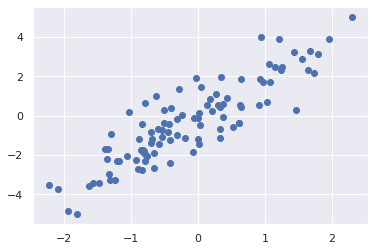

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [108]:
indices = generator.choice(X.shape[0],size=20, replace=False )
indices = np.sort(indices)

In [109]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

In [110]:
count        = np.arange(100)
indices_bool = [True if x in indices else False for x in count ]
# indices_bool
selection_bool = X[indices_bool]

np.array_equal(selection,selection_bool)

True

This sort of strategy is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models (see Hyperparameters and Model Validation), and in sampling approaches to answering statistical questions.

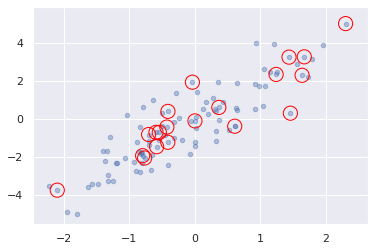

In [111]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.4, s=20)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', edgecolors='red', s=200);

## Modifying Values with Fancy Indexing

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array. For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

In [112]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [113]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [114]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


where's the 4 gone :-) ?

In [115]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

 Conceptually, this is because x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1. x[i] + 1 is evaluated, and then the result is assigned to the indices in x. With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results. 

In [125]:
x = np.zeros(10)
x[[2,2,3,9]]=150777
x

array([     0.,      0., 150777., 150777.,      0.,      0.,      0.,
            0.,      0., 150777.])

In [128]:
x[[0,0,0]]+=1
x

array([2.00000e+00, 3.00000e+00, 1.50777e+05, 1.50777e+05, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.50777e+05])

Conceptually, this is because x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1. x[i] + 1 is evaluated, and then the result is assigned to the indices in x. With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

So what if you want the other behavior where the operation is repeated? For this, you can use the at() method of ufuncs (available since NumPy 1.8), and do the following:

In [127]:
np.add.at(x,[1,1,1])

array([1.00000e+00, 3.00000e+00, 1.50777e+05, 1.50777e+05, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.50777e+05])

## Example: Binning Data

In [141]:
np.random.seed(150777)
x = np.random.randn(100)


# compute a histogram by hand
min      = -5
max      = 5
num_bins = 20
bins   = np.linspace(min,max,num_bins)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
# from the doc of searchsorted" 
# Find indices where elements should be inserted to maintain order.
# Find the indices into a sorted array `a` such that, if the
# corresponding elements in `v` were inserted before the indices, the
# order of `a` would be preserved.

i = np.searchsorted(bins,x)
np.add.at(counts, i , 1)

/usr/local/bin/start_ipykernel.py:2: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  if __name__ == '__main__':


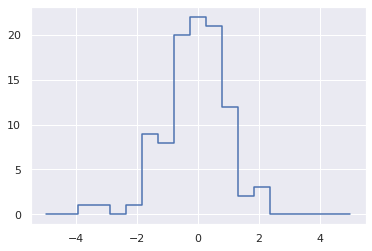

In [142]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

(array([ 0.,  0.,  1.,  1.,  0.,  1.,  9.,  8., 20., 22., 21., 12.,  2.,
         3.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

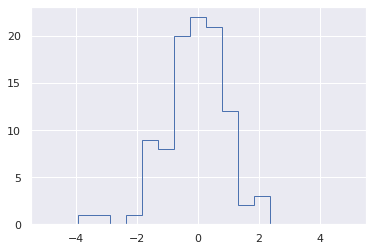

In [144]:
plt.hist(x, bins, histtype='step')

In [145]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
46 µs ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
22.2 µs ± 2.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Our own one-line algorithm is several times faster than the optimized algorithm in NumPy! How can this be? If you dig into the np.histogram source code (you can do this in IPython by typing np.histogram??), you'll see that it's quite a bit more involved than the simple search-and-count that we've done; this is because NumPy's algorithm is more flexible, and particularly is designed for better performance when the number of data points becomes large:

In [146]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
93.1 ms ± 4.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
152 ms ± 9.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
